# Word Embeddings

Word embeddings are words embedded in vector space, or words converted to a set a numbers, based on their collocations. They're often described as *semantic* vectors (as opposed to stylistic or syntactic), because they encode information that can be construed as carrying meaning. 

Let's explore the vector space of some stories from _Dubliners_. 

In [40]:
import spacy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
# Import a few new things for 3-D plotting. 
from mpl_toolkits.mplot3d import Axes3D, proj3d
# This magic command is used for interactive plots. 
%matplotlib notebook

First, open our copy of _Dubliners_ and split it on `##` characters, as usual.

In [4]:
dubliners = open('dubliners.md').read()
dublinersParts = dubliners.split('##')

Then see which indices correspond to which parts. 

In [7]:
[(pair[0], pair[1][:50]) for pair in enumerate(dublinersParts)]

[(0, '---\nlayout: narrative\ntitle:  Dubliners\nauthor: Ja'),
 (1, ' THE SISTERS\n\nTHERE was no hope for him this time:'),
 (2, ' AN ENCOUNTER\n\nIT WAS Joe Dillon who introduced th'),
 (3, ' ARABY\n\nNORTH RICHMOND STREET, being blind, was a '),
 (4, ' EVELINE\n\nSHE sat at the window watching the eveni'),
 (5, ' AFTER THE RACE\n\nTHE cars came scudding in towards'),
 (6, ' TWO GALLANTS\n\nTHE grey warm evening of August had'),
 (7, " THE BOARDING HOUSE\n\nMRS. MOONEY was a butcher's d"),
 (8, ' A LITTLE CLOUD\n\nEIGHT years before he had seen hi'),
 (9, ' COUNTERPARTS\n\nTHE bell rang furiously and, when M'),
 (10, ' CLAY\n\nTHE matron had given her leave to go out as'),
 (11, ' A PAINFUL CASE\n\nMR. JAMES DUFFY lived in Chapeliz'),
 (12, ' IVY DAY IN THE COMMITTEE ROOM\n\nOLD JACK raked the'),
 (13, ' A MOTHER\n\nMR HOLOHAN, assistant secretary of the '),
 (14, ' GRACE\n\nTWO GENTLEMEN who were in the lavatory at '),
 (15, " THE DEAD\n\nLILY, the caretaker's daughter, was lit")]

Let's grab "Clay," which is number 10. 

In [8]:
clay = dublinersParts[10]

Load SpaCy.

In [9]:
nlp = spacy.load('en_core_web_lg')

Process "Clay" using SpaCy. 

In [10]:
clayDoc = nlp(clay)

Now if we grab a word from "Clay" (this one is the word "forward"), we can take a look at its vector. It will just be 300 numbers, since this is just a list of numbers. 

In [16]:
clayDoc[25].vector

array([  4.68239993e-01,   1.26019996e-02,  -4.80599999e-01,
         2.95800000e-01,   9.10560012e-01,  -1.46450000e-02,
         3.00880009e-03,   8.53089988e-02,  -2.48060003e-01,
         2.81649995e+00,  -8.03479999e-02,   3.63480002e-01,
         3.03469986e-01,   2.71569997e-01,  -2.19740003e-01,
         1.43689997e-02,  -2.49650002e-01,   9.06090021e-01,
        -4.95359987e-01,   2.32350007e-01,   1.25389993e-01,
        -9.91590023e-02,   2.72879988e-01,  -4.77479994e-02,
        -1.51740000e-01,   3.76150012e-01,   1.64210007e-01,
        -3.55230004e-01,  -6.47309981e-03,  -4.70310003e-01,
        -4.31279987e-01,   1.97119996e-01,  -6.08889982e-02,
        -6.42979965e-02,   2.69109994e-01,  -3.01649988e-01,
         2.43430007e-02,   3.77389997e-01,  -4.73919995e-02,
        -7.63719976e-01,  -1.36730000e-01,   3.06380004e-01,
        -5.55329993e-02,  -4.28350002e-01,   1.60469994e-01,
         2.80490011e-01,  -1.51289999e-02,   1.13430001e-01,
        -5.31009972e-01,

Now let's plot, say, all the nouns in "Clay":

In [17]:
clayNouns = [w for w in clayDoc if w.pos_ == "NOUN"]

In [19]:
clayNouns[:10]

[matron, leave, women, tea, evening, kitchen, span, cook, copper, boilers]

How many are there? 

In [25]:
len(clayNouns)

442

Grab all the vectors for all the nouns, then make a list of labels while we're at it. 

In [21]:
clayVecs = [w.vector for w in clayNouns]
clayLabels = [w.string.strip() for w in clayNouns]

Instantiate a PCA object, and tell it we're going to be trying to reduce our 300-dimensional vectors to just 3. 

In [22]:
pca = PCA(n_components=3)

Perform the PCA dimensionality reduction. 

In [23]:
pcaOut = pca.fit_transform(clayVecs)

Verify that we have a 442x3 matrix, where 442 is the number of nouns in "Clay," and 3 is the number of dimensions (soon to be the X, Y, and Z axes in our plot). 

In [24]:
pcaOut.shape

(442, 3)

Here's a function to plot these points on a scatter plot, in 3D, and annotate it using the labels we created: 

In [ ]:
def plotResults(df, labels): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], marker='o')
    for i, label in enumerate(labels):
        ax.text(df.loc[i][0], df.loc[i][1], df.loc[i][2], label)

The function requires that we pass it in as a DataFrame.

In [27]:
df = pd.DataFrame(pcaOut)

Now we can plot the results: 

<IPython.core.display.Javascript object>


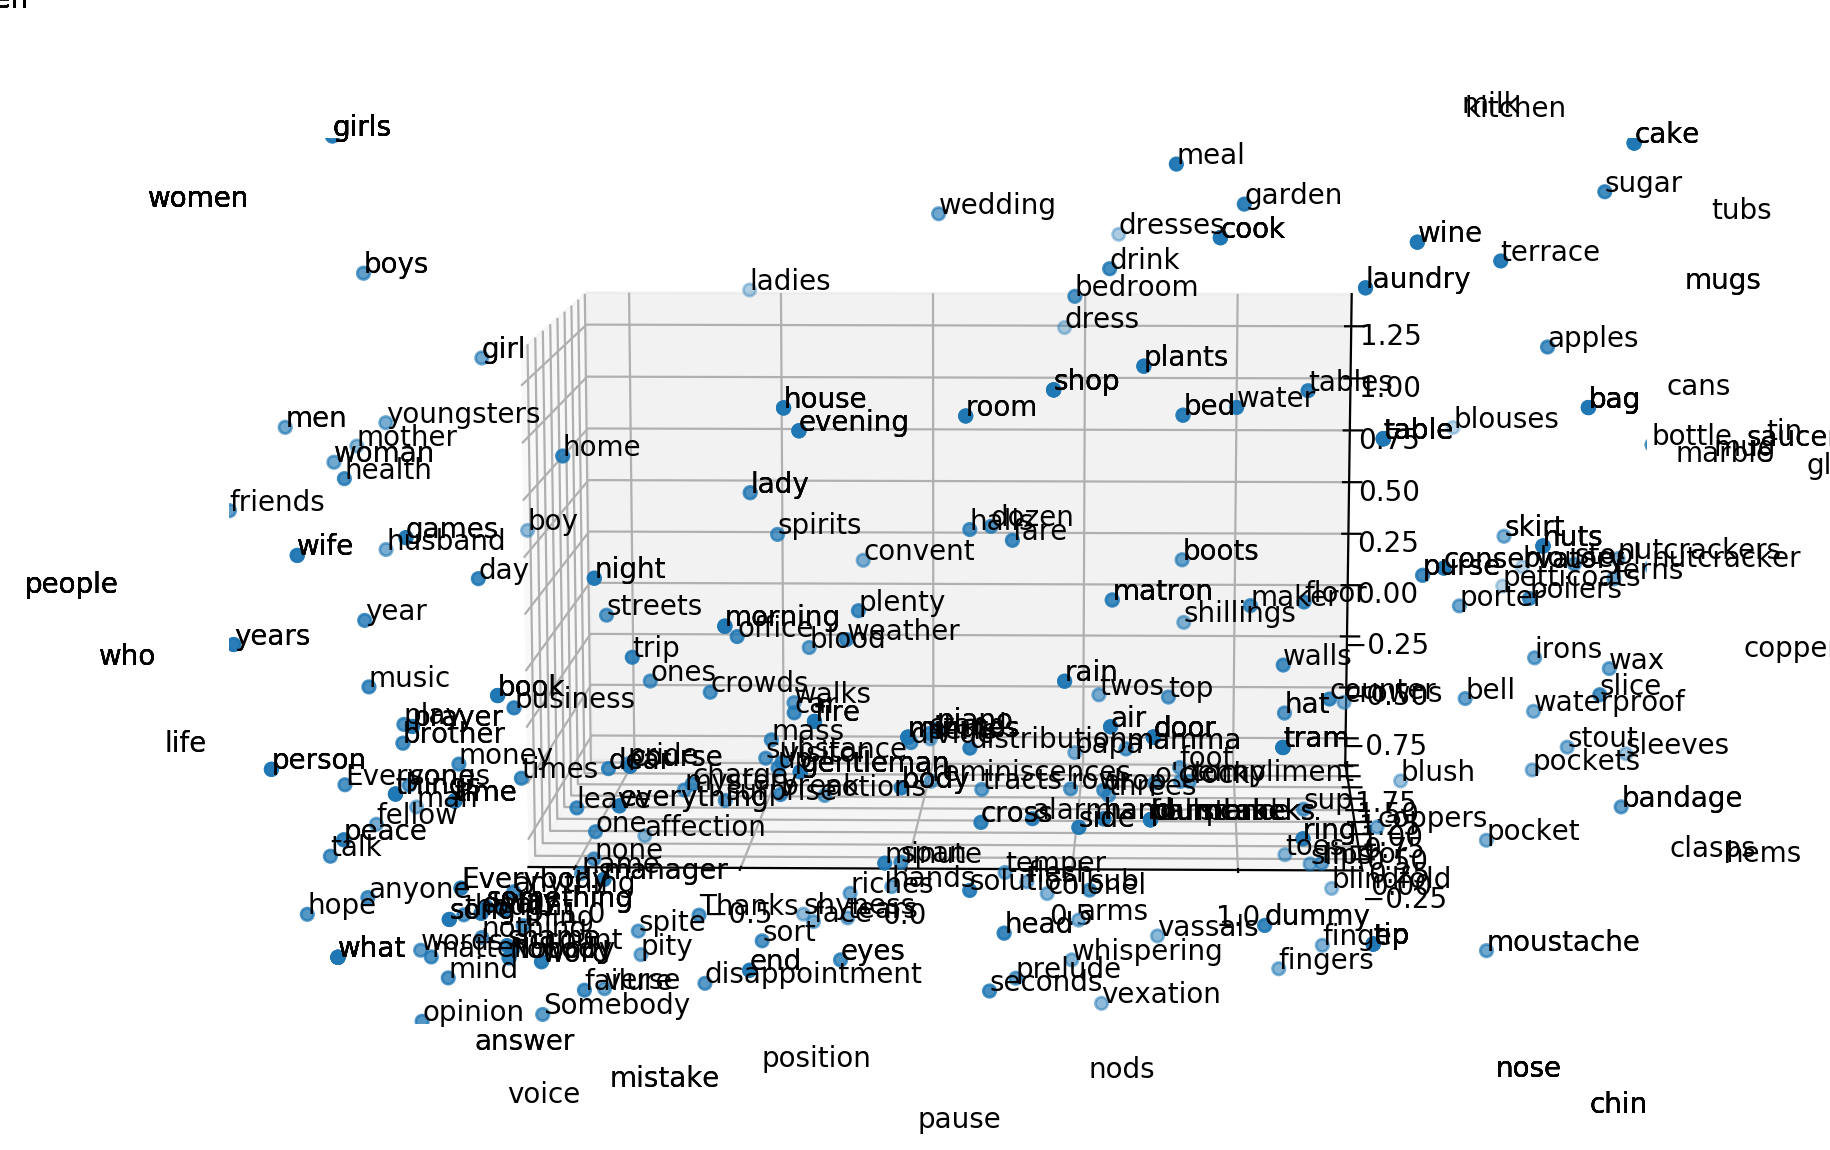

In [28]:
plotResults(df, clayLabels)

## Word Similarities

We can also compute word similarities (cosine distances between word vectors) using SpaCy's `.similarity()` method for words. First, let's grab some random nouns: 

In [41]:
clayNouns[100:110]

[hands, petticoats, sleeves, blouses, arms, mugs, cook, dummy, tea, milk]

In [43]:
hands = clayNouns[100]
petticoats = clayNouns[101]
sleeves, blouses = clayNouns[102], clayNouns[103]
arms = clayNouns[104]

How similar are hands and petticoats? 

In [36]:
hands.similarity(petticoats)

0.12848523

How about hands and arms? 

In [37]:
hands.similarity(arms)

0.64497548

And sleeves and blouses? 

In [38]:
sleeves.similarity(blouses)

0.60364556